In [65]:
import pandas as pd

df = pd.read_csv("merged_data.csv", parse_dates=["Date"])

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Date                            0
Exchange Rate (USD/INR)         0
Exchange_Rate_Lag_1             0
Exchange_Rate_Lag_3             0
Exchange_Rate_Lag_7             0
Exchange_Rate_MA_3              0
Exchange_Rate_MA_7              0
Exchange_Rate_Volatility_7      0
Exchange_Rate_Percent_Change    0
NIFTY                           0
S&P500                          0
NIFTY_Lag_1                     0
SP500_Lag_1                     0
NIFTY_Lag_3                     0
SP500_Lag_3                     0
NIFTY_Lag_7                     0
SP500_Lag_7                     0
NIFTY_MA_3                      0
SP500_MA_3                      0
NIFTY_MA_7                      0
SP500_MA_7                      0
NIFTY_Percent_Change            0
SP500_Percent_Change            0
Interest Rate USA               0
Interest Rate India             0
Interest_Rate_India_Change      0
Interest_Rate_US_Change         0
Inflation_Rate_India            0
Inflation_Rate_US   

In [66]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


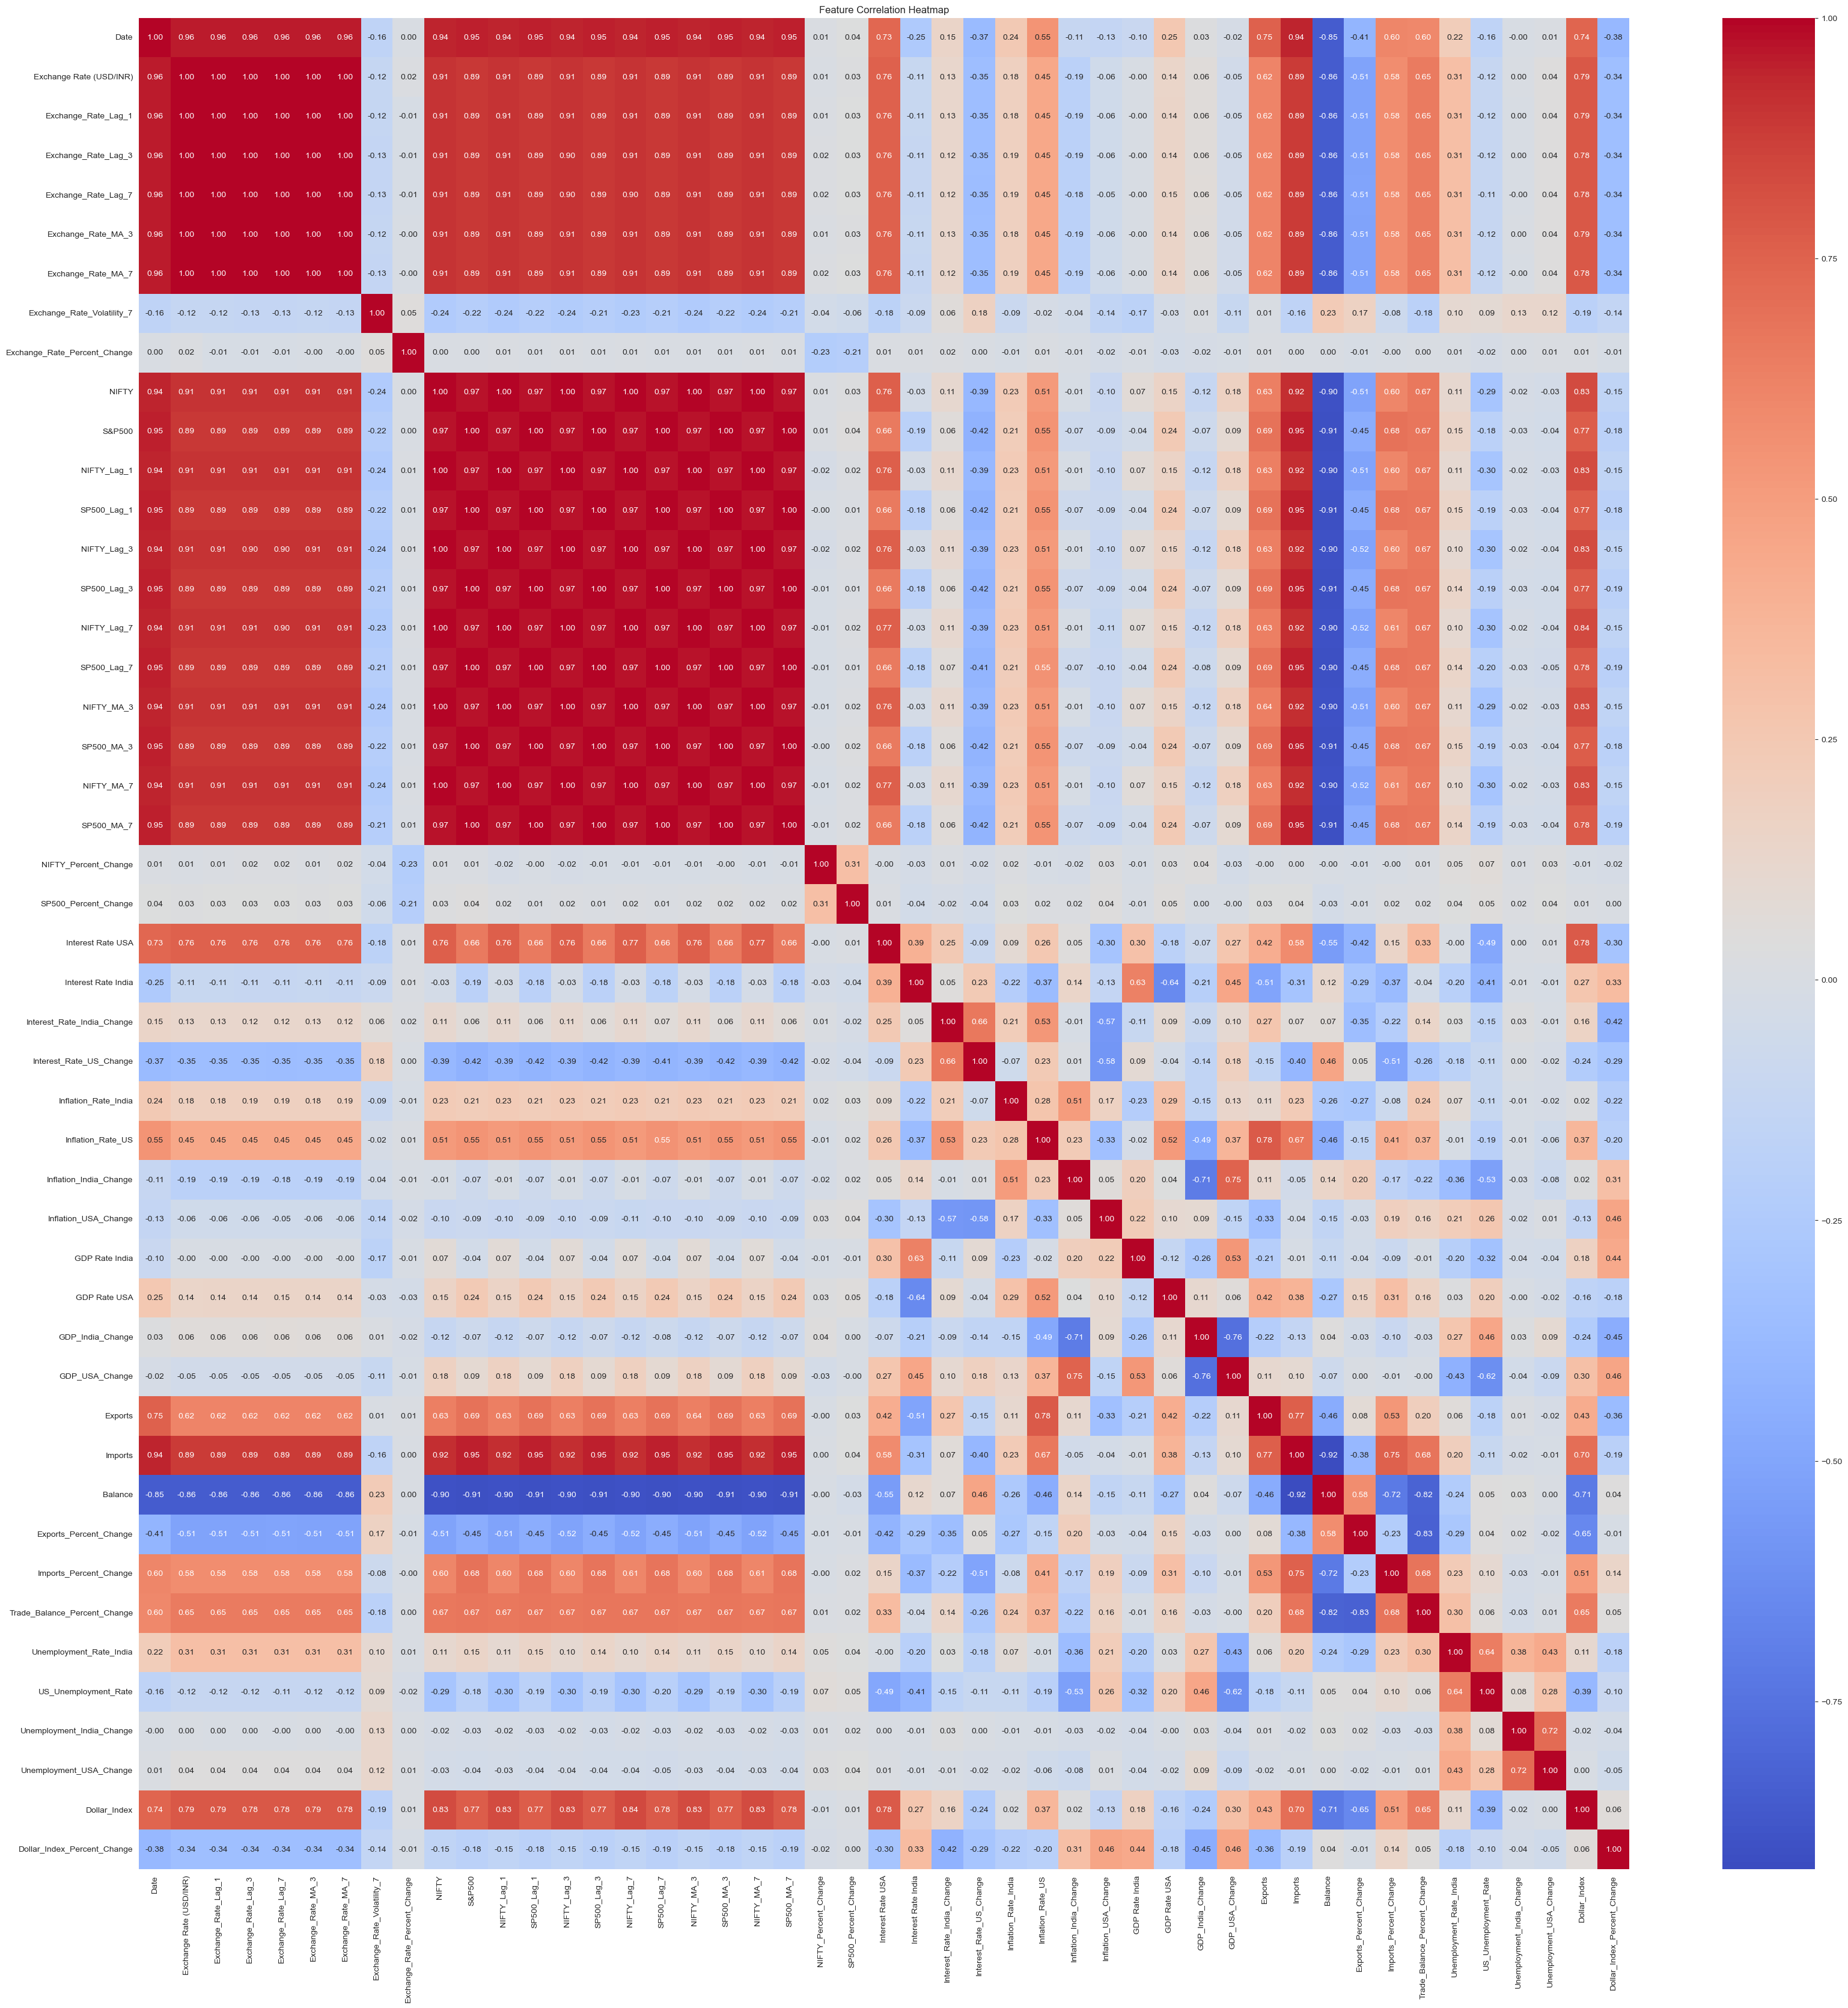

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [68]:
df.corr()

,Date,Exchange Rate (USD/INR),Exchange_Rate_Lag_1,Exchange_Rate_Lag_3,Exchange_Rate_Lag_7,Exchange_Rate_MA_3,Exchange_Rate_MA_7,Exchange_Rate_Volatility_7,Exchange_Rate_Percent_Change,NIFTY,...,Balance,Exports_Percent_Change,Imports_Percent_Change,Trade_Balance_Percent_Change,Unemployment_Rate_India,US_Unemployment_Rate,Unemployment_India_Change,Unemployment_USA_Change,Dollar_Index,Dollar_Index_Percent_Change
Date,1.000000,0.955394,0.955375,0.955325,0.955227,0.955527,0.955705,-0.162852,0.004406,0.942673,...,-0.850171,-0.411794,0.603750,0.601440,0.216380,-0.160077,-0.002737,0.008726,0.740419,-0.383424
Exchange Rate (USD/INR),0.955394,1.000000,0.999634,0.998950,0.997647,0.999800,0.999366,-0.122801,0.017533,0.905428,...,-0.855396,-0.512281,0.575948,0.648947,0.312596,-0.117374,0.000261,0.043069,0.785523,-0.340882
Exchange_Rate_Lag_1,0.955375,0.999634,1.000000,0.999281,0.997974,0.999917,0.999602,-0.124103,-0.009427,0.905436,...,-0.855616,-0.511994,0.576107,0.648962,0.312520,-0.116908,0.000203,0.042842,0.785205,-0.340604
Exchange_Rate_Lag_3,0.955325,0.998950,0.999281,1.000000,0.998631,0.999449,0.999788,-0.127635,-0.008171,0.905505,...,-0.855980,-0.511299,0.576036,0.648828,0.312368,-0.116046,0.000029,0.042017,0.784423,-0.340200
Exchange_Rate_Lag_7,0.955227,0.997647,0.997974,0.998631,1.000000,0.998133,0.999028,-0.133697,-0.008068,0.905805,...,-0.856713,-0.510693,0.575611,0.648989,0.311715,-0.114487,-0.001619,0.039336,0.782913,-0.338999
Exchange_Rate_MA_3,0.955527,0.999800,0.999917,0.999449,0.998133,1.000000,0.999731,-0.124288,-0.000280,0.905591,...,-0.855740,-0.512033,0.576112,0.649028,0.312587,-0.116920,0.000246,0.042870,0.785311,-0.340702
Exchange_Rate_MA_7,0.955705,0.999366,0.999602,0.999788,0.999028,0.999731,1.000000,-0.127817,-0.004671,0.905901,...,-0.856315,-0.511650,0.576139,0.649164,0.312418,-0.116150,-0.000211,0.041764,0.784734,-0.340258
Exchange_Rate_Volatility_7,-0.162852,-0.122801,-0.124103,-0.127635,-0.133697,-0.124288,-0.127817,1.000000,0.047485,-0.242015,...,0.229957,0.166166,-0.082340,-0.182668,0.100777,0.088330,0.125737,0.122202,-0.185582,-0.135372
Exchange_Rate_Percent_Change,0.004406,0.017533,-0.009427,-0.008171,-0.008068,-0.000280,-0.004671,0.047485,1.000000,0.003108,...,0.004850,-0.011405,-0.002978,0.000946,0.005084,-0.016900,0.002624,0.008723,0.014903,-0.010610
NIFTY,0.942673,0.905428,0.905436,0.905505,0.905805,0.905591,0.905901,-0.242015,0.003108,1.000000,...,-0.896075,-0.514818,0.604472,0.668702,0.106274,-0.293735,-0.020380,-0.033732,0.832326,-0.154552


In [69]:
columns_to_drop = [
    'Exchange_Rate_Lag_7', 'Exchange_Rate_MA_7', 
    'NIFTY_Lag_3', 'NIFTY_Lag_7', 'NIFTY_MA_3', 'NIFTY_MA_7',
    'SP500_Lag_3', 'SP500_Lag_7', 'SP500_MA_3', 'SP500_MA_7', 
    'Interest_Rate_India_Change', 'Interest_Rate_US_Change',
    'Balance', 'Exports_Percent_Change', 'Imports_Percent_Change', 'Trade_Balance_Percent_Change', 
    'Unemployment_India_Change', 'Unemployment_USA_Change', 
    'Inflation_India_Change', 'Inflation_USA_Change'] 
#since these are either highly correlated or have no correlation with the exchange rates

In [70]:
df_cleaned = df.drop(columns=columns_to_drop, axis = 1)

In [71]:
# df_cleaned.isnull().sum()

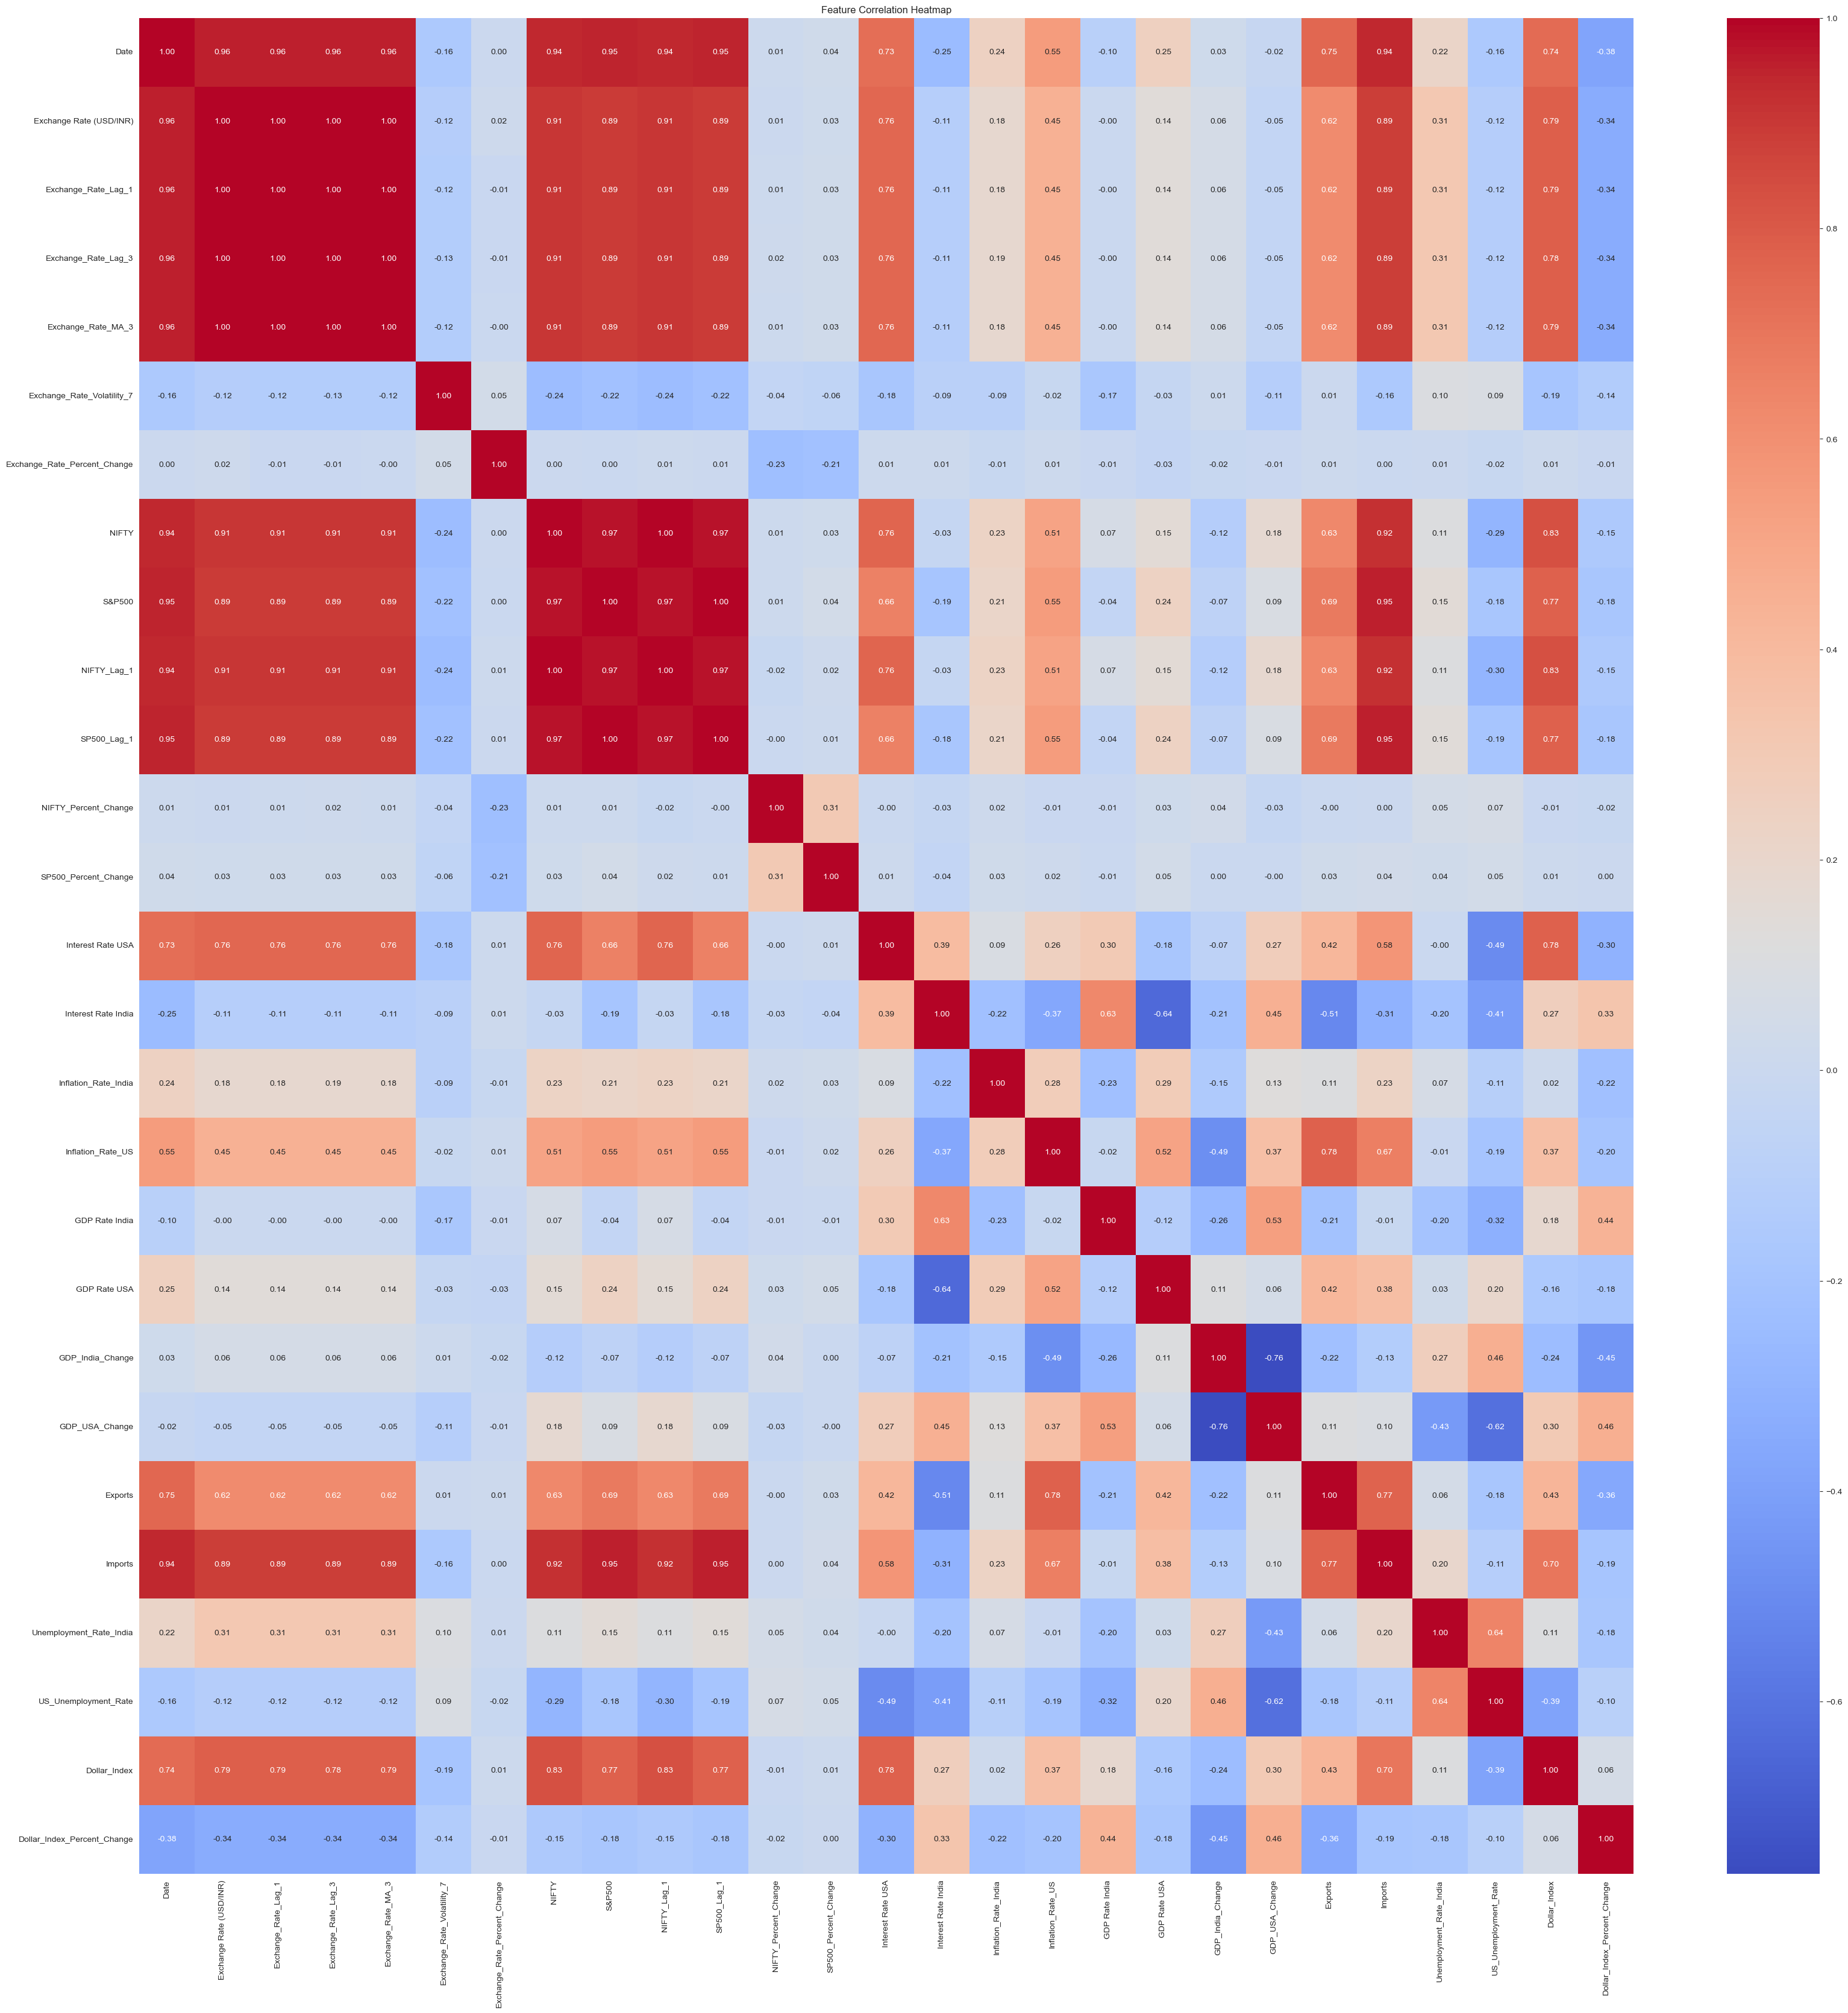

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

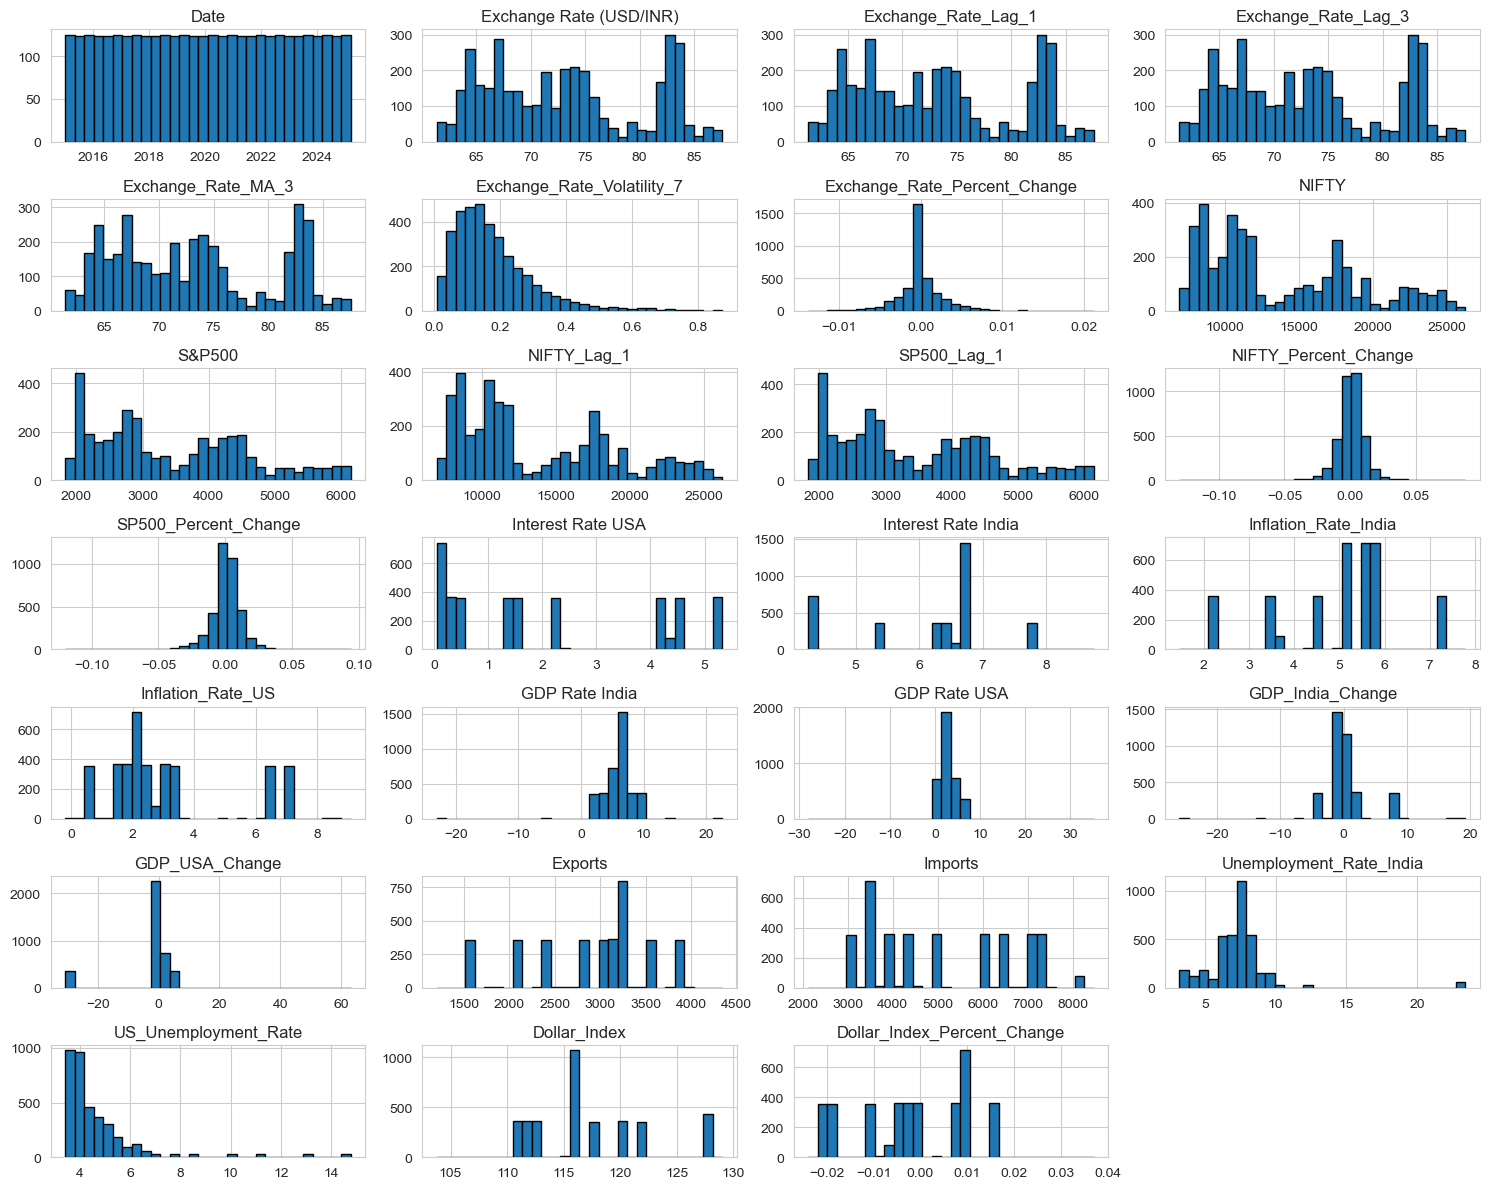

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
df_cleaned.hist(figsize=(15, 12), bins=30, edgecolor='black', layout=(7, 4))

plt.tight_layout()
plt.show()

In [74]:
from scipy.stats import skew

# Calculate skewness for each numeric column
skewness_values = df_cleaned.drop(columns=["Date"]).skew().sort_values(ascending=False)

print("Skewness of each column:")
print(skewness_values)

Skewness of each column:
Unemployment_Rate_India         3.707440
US_Unemployment_Rate            3.525314
Exchange_Rate_Volatility_7      1.659359
Inflation_Rate_US               1.088363
GDP_India_Change                0.884292
Dollar_Index                    0.702130
NIFTY_Lag_1                     0.674256
NIFTY                           0.673643
SP500_Lag_1                     0.566382
S&P500                          0.563858
GDP Rate USA                    0.542734
Interest Rate USA               0.538715
Exchange_Rate_Percent_Change    0.443510
Exchange_Rate_Lag_3             0.295237
Exchange_Rate_MA_3              0.294784
Exchange_Rate_Lag_1             0.294529
Exchange Rate (USD/INR)         0.294241
Imports                         0.285656
Dollar_Index_Percent_Change    -0.223904
SP500_Percent_Change           -0.288209
Exports                        -0.516065
Inflation_Rate_India           -0.608407
NIFTY_Percent_Change           -0.648669
Interest Rate India            -

In [75]:
import numpy as np
from scipy.stats import boxcox

# List of positively skewed columns
pos_skewed_cols = ['Unemployment_Rate_India', 'US_Unemployment_Rate', 'Exchange_Rate_Volatility_7', 'Inflation_Rate_US']

# Apply log transformation for positive skewness
for col in pos_skewed_cols:
    df_cleaned[col] = np.log1p(df_cleaned[col])  # log(1 + x) to avoid log(0) error


In [99]:
# print(df_cleaned.isna().sum())

In [79]:
from scipy.stats import skew

# Calculate skewness for each numeric column
skewness_values = df_cleaned.drop(columns=["Date"]).skew().sort_values(ascending=False)

# Print skewness values
print("Skewness of each column:")
print(skewness_values)

Skewness of each column:
US_Unemployment_Rate            2.278606
Exchange_Rate_Volatility_7      1.257505
GDP_India_Change                0.884292
Dollar_Index                    0.702130
NIFTY_Lag_1                     0.674256
NIFTY                           0.673643
SP500_Lag_1                     0.566382
S&P500                          0.563858
Unemployment_Rate_India         0.556940
GDP Rate USA                    0.542734
Interest Rate USA               0.538715
Exchange_Rate_Percent_Change    0.443510
Inflation_Rate_US               0.347571
Exchange_Rate_Lag_3             0.295237
Exchange_Rate_MA_3              0.294784
Exchange_Rate_Lag_1             0.294529
Exchange Rate (USD/INR)         0.294241
Imports                         0.285656
Dollar_Index_Percent_Change    -0.223904
SP500_Percent_Change           -0.288209
Exports                        -0.516065
Inflation_Rate_India           -0.608407
NIFTY_Percent_Change           -0.648669
Interest Rate India            -

In [80]:
from scipy.stats import boxcox
columns_to_transform = ['US_Unemployment_Rate', 'Exchange_Rate_Volatility_7']
print("Before Transformation:\n", df[columns_to_transform].skew())

df_boxcox = df.copy()
df_boxcox[columns_to_transform] = df_boxcox[columns_to_transform] + 1  
df_boxcox[columns_to_transform] = df_boxcox[columns_to_transform].apply(lambda x: boxcox(x)[0])
print("\nAfter Box-Cox Transformation:\n", df_boxcox[columns_to_transform].skew())

Before Transformation:
 US_Unemployment_Rate          3.525314
Exchange_Rate_Volatility_7    1.659359
dtype: float64

After Box-Cox Transformation:
 US_Unemployment_Rate          0.314473
Exchange_Rate_Volatility_7    0.097189
dtype: float64


In [81]:
df_cleaned['US_Unemployment_Rate'], _ = boxcox(df_cleaned['US_Unemployment_Rate'] + 1) 
df_cleaned['Exchange_Rate_Volatility_7'], _ = boxcox(df_cleaned['Exchange_Rate_Volatility_7'] + 1)

In [82]:
print(df[['GDP Rate India', 'GDP_USA_Change']].var())
print('--'*50)
print(df[['GDP Rate India', 'GDP_USA_Change']].isnull().sum())
print('--'*50)
print(df[['GDP Rate India', 'GDP_USA_Change']].nunique())
print('--'*50)
print(df[['GDP Rate India', 'GDP_USA_Change']].std())
print('--'*50)
print(df[['GDP Rate India', 'GDP_USA_Change']].describe())

GDP Rate India     5.709871
GDP_USA_Change    87.864421
dtype: float64
----------------------------------------------------------------------------------------------------
GDP Rate India    0
GDP_USA_Change    0
dtype: int64
----------------------------------------------------------------------------------------------------
GDP Rate India    37
GDP_USA_Change    38
dtype: int64
----------------------------------------------------------------------------------------------------
GDP Rate India    2.389534
GDP_USA_Change    9.373602
dtype: float64
----------------------------------------------------------------------------------------------------
       GDP Rate India  GDP_USA_Change
count     3733.000000     3733.000000
mean         5.994026       -3.064934
std          2.389534        9.373602
min        -23.100000      -30.800000
25%          4.800000       -1.900000
50%          6.200000       -0.800000
75%          7.200000        0.700000
max         22.600000       63.300000


In [83]:
# from scipy.stats import skew

# skewness_gdp = df[['GDP Rate India', 'GDP_USA_Change']].skew()
# print(skewness_gdp)

In [98]:
# print(df_cleaned.isna().sum())

In [85]:
from scipy.stats import boxcox
columns_to_transform = ['GDP Rate India', 'GDP_USA_Change']
print("Before Transformation:\n", df[columns_to_transform].skew())

df = df_cleaned.copy()
df['GDP_Rate_India_sqrt'] = np.sqrt(df_cleaned['GDP Rate India'].max() + 1 - df_cleaned['GDP Rate India'])
df['GDP_USA_Change_sqrt'] = np.sqrt(df_cleaned['GDP_USA_Change'].max() + 1 - df_cleaned['GDP_USA_Change'])
print("\nAfter Square-Root Transformation:\n", df[columns_to_transform].skew())

Before Transformation:
 GDP Rate India   -1.465575
GDP_USA_Change   -2.138556
dtype: float64

After Square-Root Transformation:
 GDP Rate India   -1.465575
GDP_USA_Change   -2.138556
dtype: float64


In [97]:
# print(df_cleaned.isna().sum())

In [87]:
df_cleaned['GDP Rate India'] = np.sqrt(df_cleaned['GDP Rate India'].max() + 1 - df_cleaned['GDP Rate India'])
df_cleaned['GDP_USA_Change'] = np.sqrt(df_cleaned['GDP_USA_Change'].max() + 1 - df_cleaned['GDP_USA_Change'])

In [89]:
from scipy.stats import skew

# Calculate skewness for each numeric column
skewness_values = df_cleaned.drop(columns=["Date"]).skew().sort_values(ascending=False)

# Print skewness values
print("Skewness of each column:")
print(skewness_values)

Skewness of each column:
GDP_India_Change                0.884292
Dollar_Index                    0.702130
NIFTY_Lag_1                     0.674256
NIFTY                           0.673643
SP500_Lag_1                     0.566382
S&P500                          0.563858
Unemployment_Rate_India         0.556940
GDP Rate USA                    0.542734
Interest Rate USA               0.538715
Exchange_Rate_Percent_Change    0.443510
Inflation_Rate_US               0.347571
GDP_USA_Change                  0.332982
Exchange_Rate_Lag_3             0.295237
Exchange_Rate_MA_3              0.294784
Exchange_Rate_Lag_1             0.294529
Exchange Rate (USD/INR)         0.294241
Imports                         0.285656
US_Unemployment_Rate            0.269665
Exchange_Rate_Volatility_7      0.071302
Dollar_Index_Percent_Change    -0.223904
SP500_Percent_Change           -0.288209
GDP Rate India                 -0.319550
Exports                        -0.516065
Inflation_Rate_India           -

In [90]:
# df_cleaned.dtypes

In [91]:
# df_cleaned['GDP Rate India'].skew()

In [92]:
# df_cleaned['GDP_USA_Change'].skew()

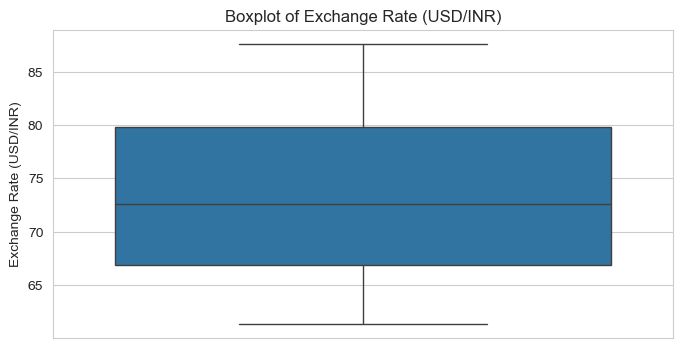

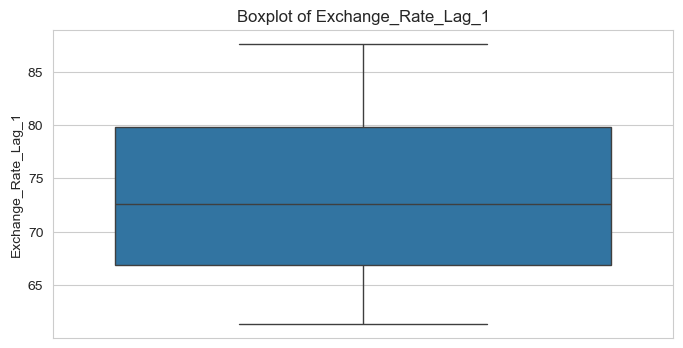

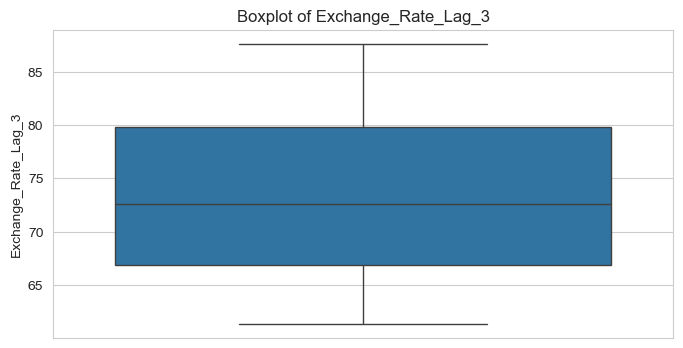

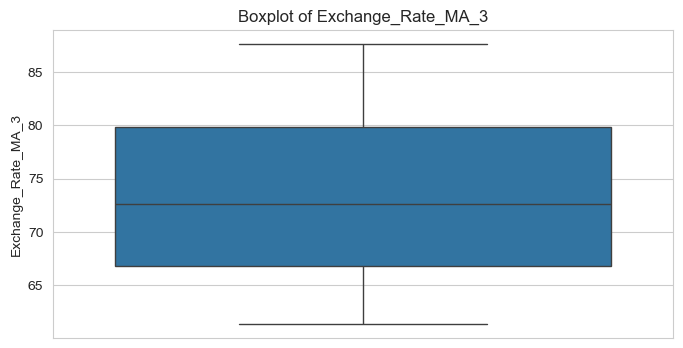

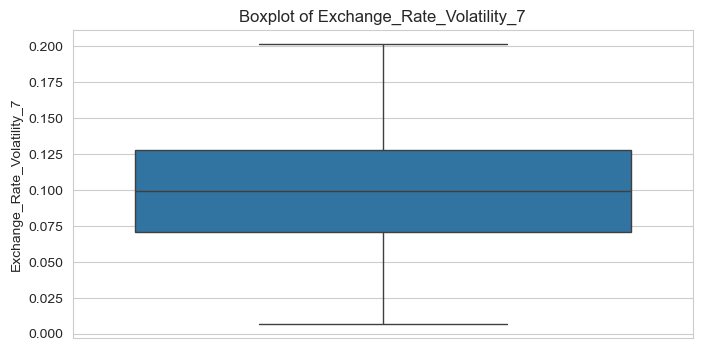

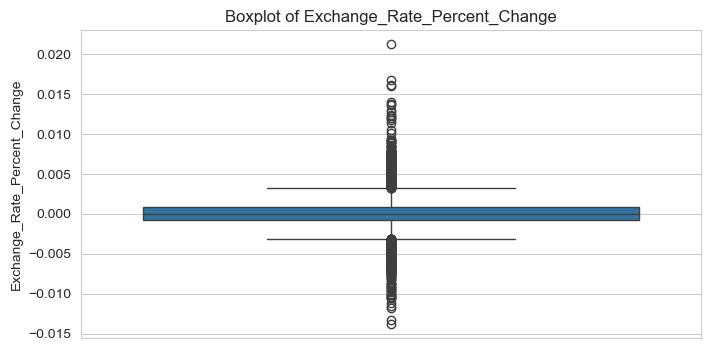

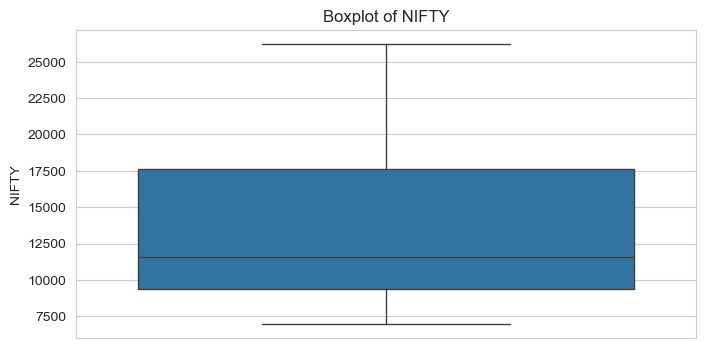

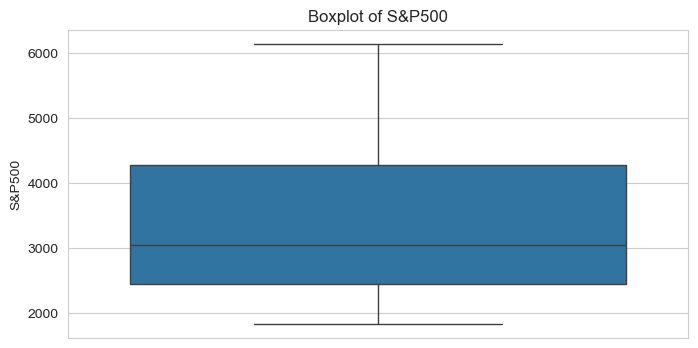

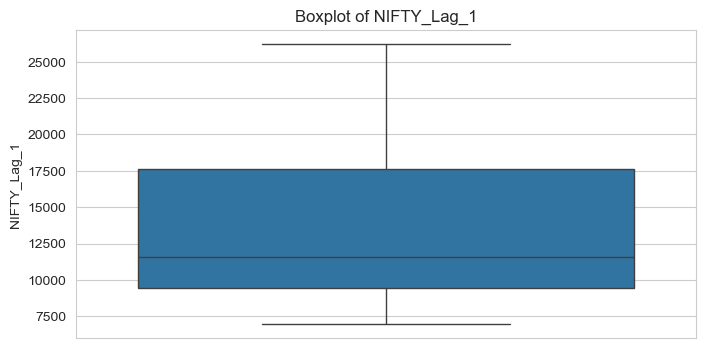

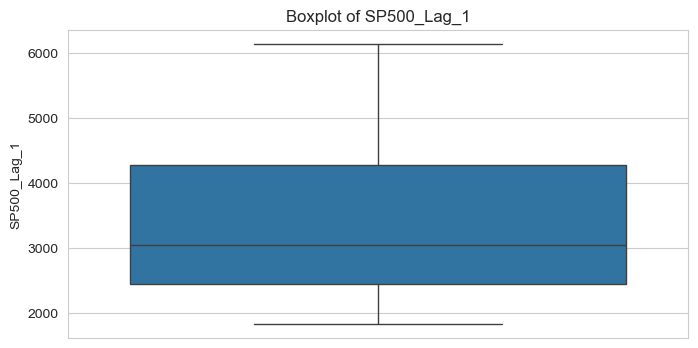

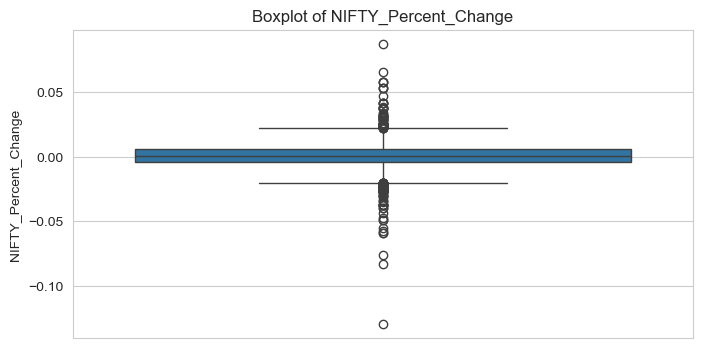

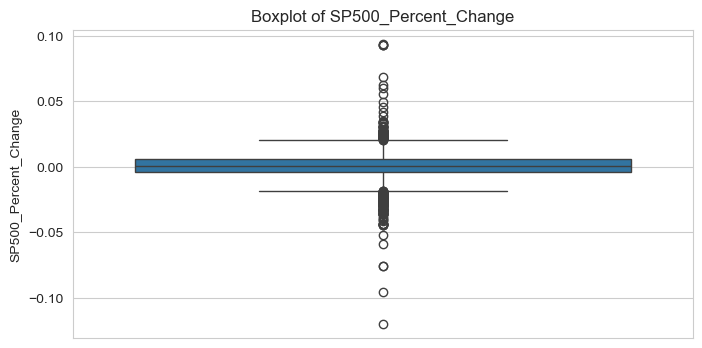

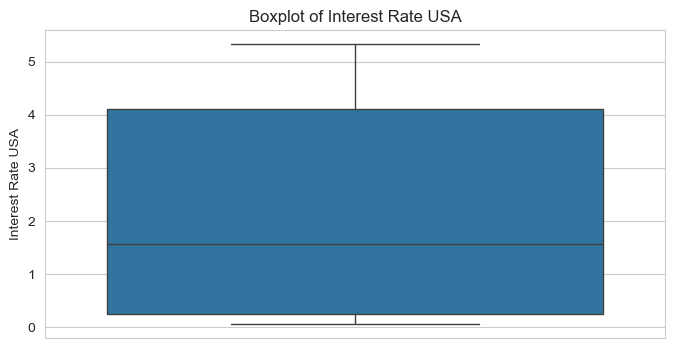

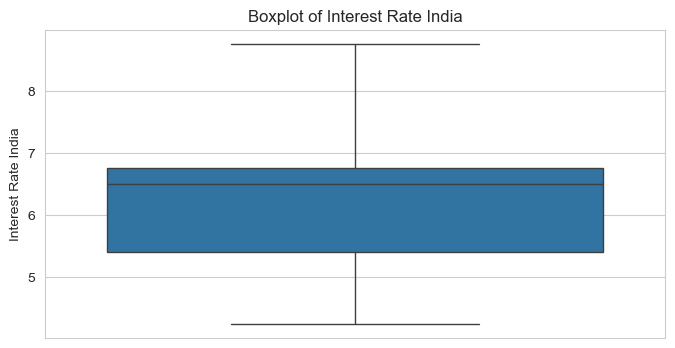

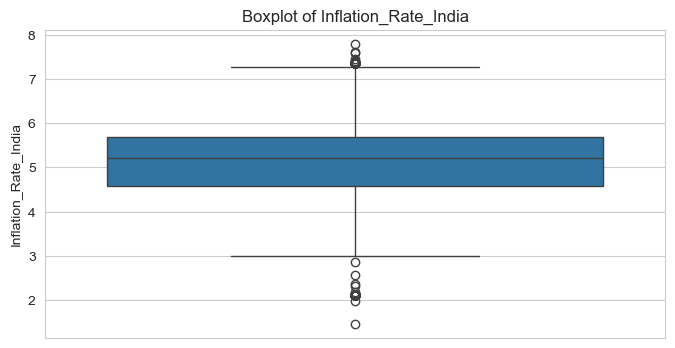

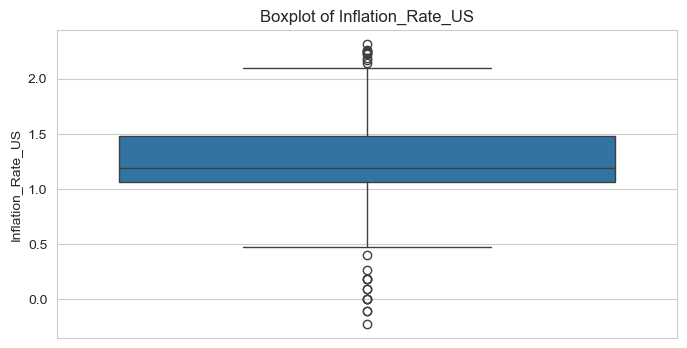

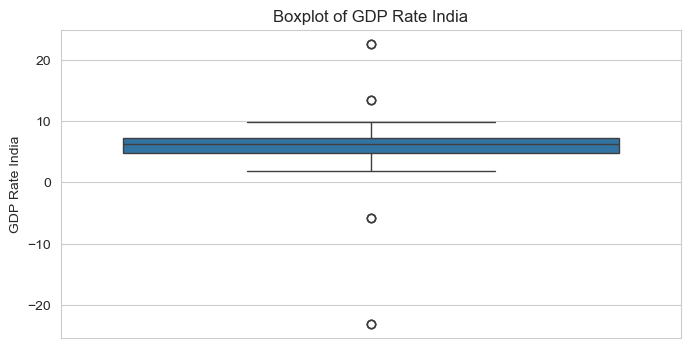

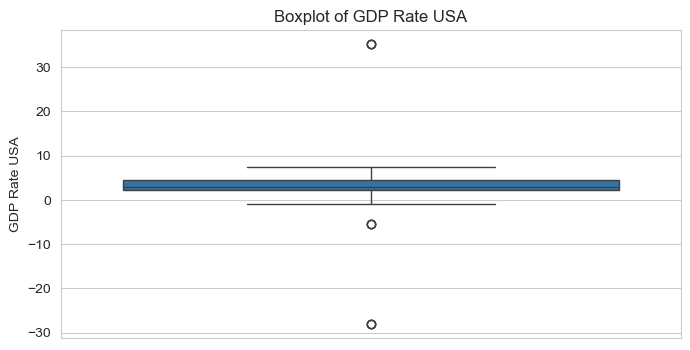

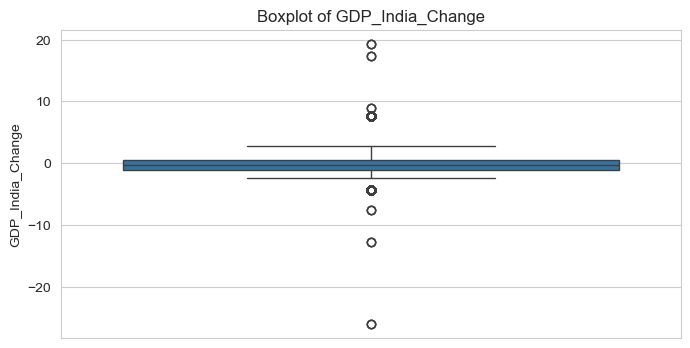

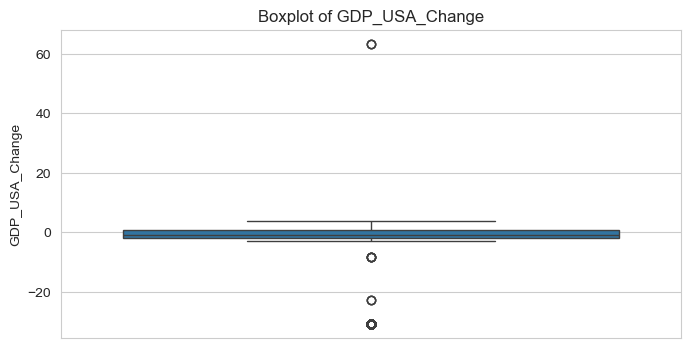

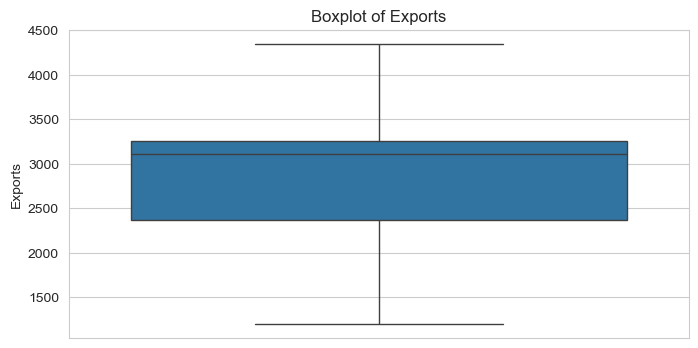

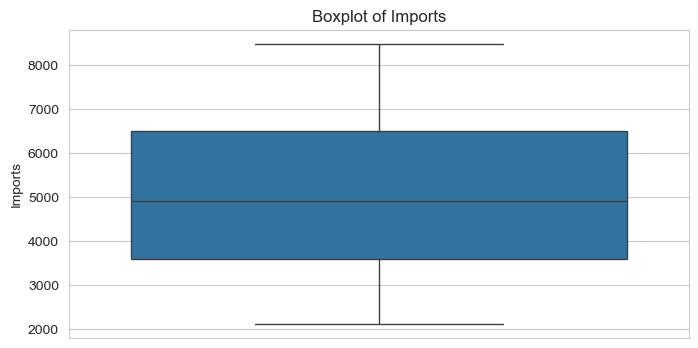

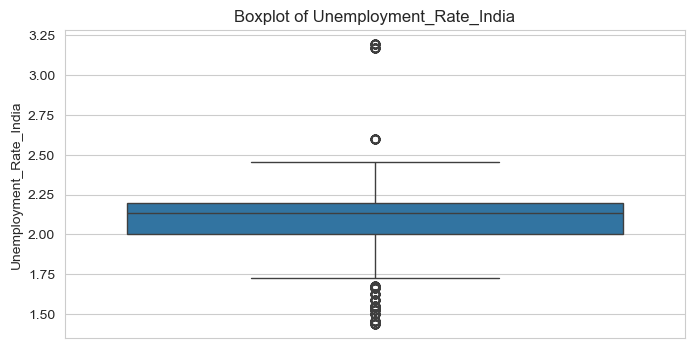

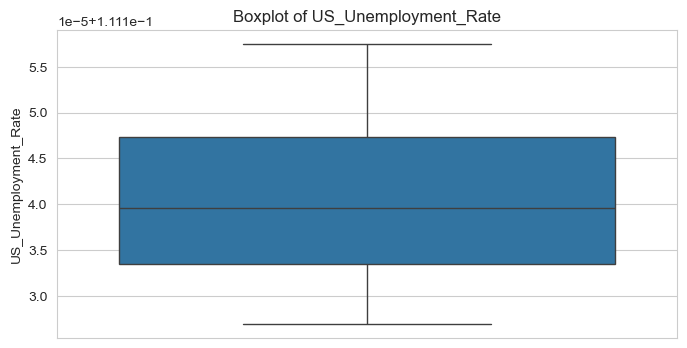

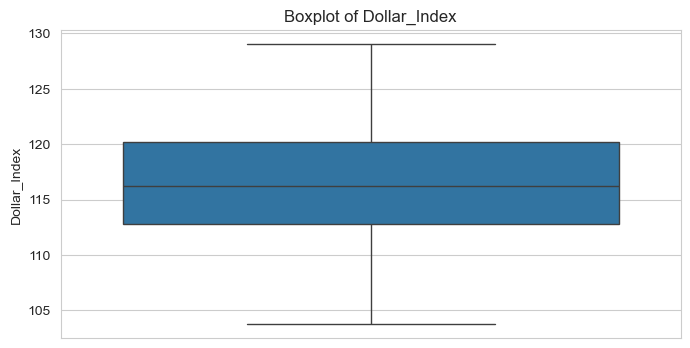

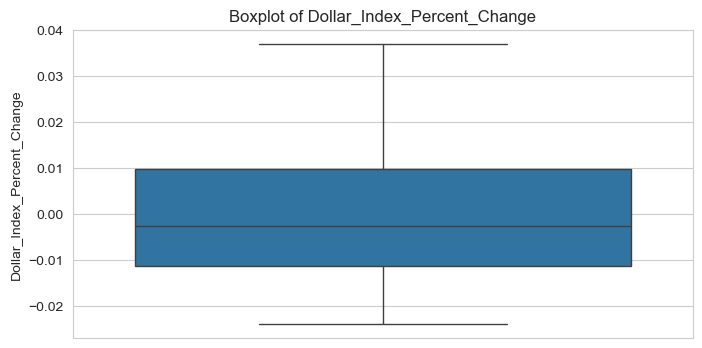

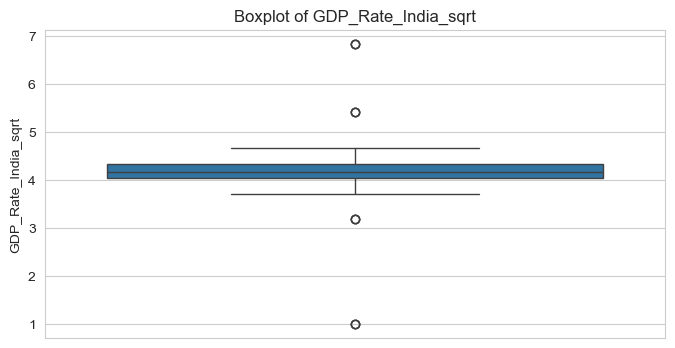

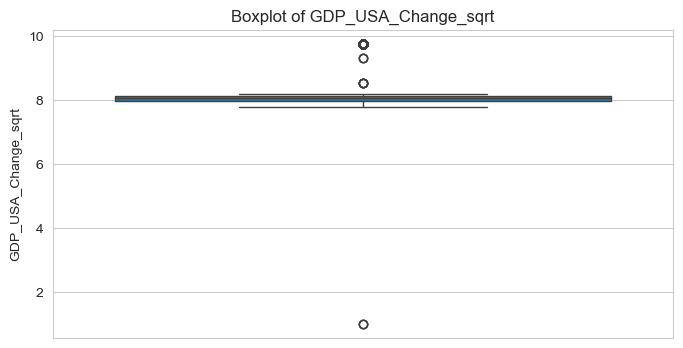

In [93]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [94]:
X = df_cleaned.drop(['Date'], axis=1)

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1


# Outlier detection
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Count of outliers in each column

Exchange Rate (USD/INR)           0
Exchange_Rate_Lag_1               0
Exchange_Rate_Lag_3               0
Exchange_Rate_MA_3                0
Exchange_Rate_Volatility_7        0
Exchange_Rate_Percent_Change    656
NIFTY                             0
S&P500                            0
NIFTY_Lag_1                       0
SP500_Lag_1                       0
NIFTY_Percent_Change            151
SP500_Percent_Change            254
Interest Rate USA                 0
Interest Rate India               0
Inflation_Rate_India            720
Inflation_Rate_US                23
GDP Rate India                   12
GDP Rate USA                      9
GDP_India_Change                731
GDP_USA_Change                  369
Exports                           0
Imports                           0
Unemployment_Rate_India         395
US_Unemployment_Rate              0
Dollar_Index                      0
Dollar_Index_Percent_Change       0
dtype: int64


In [95]:
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

In [96]:
print(df_cleaned.isna().sum())

Date                            0
Exchange Rate (USD/INR)         0
Exchange_Rate_Lag_1             0
Exchange_Rate_Lag_3             0
Exchange_Rate_MA_3              0
Exchange_Rate_Volatility_7      0
Exchange_Rate_Percent_Change    0
NIFTY                           0
S&P500                          0
NIFTY_Lag_1                     0
SP500_Lag_1                     0
NIFTY_Percent_Change            0
SP500_Percent_Change            0
Interest Rate USA               0
Interest Rate India             0
Inflation_Rate_India            0
Inflation_Rate_US               0
GDP Rate India                  0
GDP Rate USA                    0
GDP_India_Change                0
GDP_USA_Change                  0
Exports                         0
Imports                         0
Unemployment_Rate_India         0
US_Unemployment_Rate            0
Dollar_Index                    0
Dollar_Index_Percent_Change     0
dtype: int64


In [45]:
# df = df_cleaned.copy()

In [42]:
# outlier_cols = [
#     'Exchange_Rate_Percent_Change', 'NIFTY_Percent_Change', 'SP500_Percent_Change',
#     'Inflation_Rate_India', 'Inflation_Rate_US', 'GDP Rate India', 'GDP Rate USA', 'GDP_India_Change', 
#     'GDP_USA_Change', 'Unemployment_Rate_India'
# ]

In [47]:
# df[['Exchange_Rate_Percent_Change']] = df[['Exchange_Rate_Percent_Change']].rolling(window=5, min_periods=1).mean()

In [48]:
# X = df.drop(['Date'], axis=1)

# Q1 = X.quantile(0.25)
# Q3 = X.quantile(0.75)
# IQR = Q3 - Q1


# # Outlier detection
# outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
# print(outliers.sum())  # Count of outliers in each column

Exchange Rate (USD/INR)           0
Exchange_Rate_Lag_1               0
Exchange_Rate_Lag_3               0
Exchange_Rate_MA_3                0
Exchange_Rate_Volatility_7        0
Exchange_Rate_Percent_Change    196
NIFTY                             0
S&P500                            0
NIFTY_Lag_1                       0
SP500_Lag_1                       0
NIFTY_Percent_Change            151
SP500_Percent_Change            254
Interest Rate USA                 0
Interest Rate India               0
Inflation_Rate_India            720
Inflation_Rate_US                23
GDP Rate India                  363
GDP Rate USA                      9
GDP_India_Change                731
GDP_USA_Change                    3
Exports                           0
Imports                           0
Unemployment_Rate_India         395
US_Unemployment_Rate              0
Dollar_Index                      0
Dollar_Index_Percent_Change       0
dtype: int64


In [53]:
# def cap_outliers(df, cols):
#     for col in cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)  
#     return df

# outlier_cols = [
#     'Exchange_Rate_Percent_Change', 'NIFTY_Percent_Change', 'SP500_Percent_Change',
#     'Inflation_Rate_India', 'Inflation_Rate_US', 'GDP Rate India', 'GDP Rate USA', 'GDP_India_Change', 'GDP_USA_Change',
#     'Unemployment_Rate_India'
# ]

# df = cap_outliers(df, outlier_cols)

In [54]:
# X = df.drop(['Date'], axis=1)

# Q1 = X.quantile(0.25)
# Q3 = X.quantile(0.75)
# IQR = Q3 - Q1


# # Outlier detection
# outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
# print(outliers.sum())  # Count of outliers in each column

Exchange Rate (USD/INR)         0
Exchange_Rate_Lag_1             0
Exchange_Rate_Lag_3             0
Exchange_Rate_MA_3              0
Exchange_Rate_Volatility_7      0
Exchange_Rate_Percent_Change    0
NIFTY                           0
S&P500                          0
NIFTY_Lag_1                     0
SP500_Lag_1                     0
NIFTY_Percent_Change            0
SP500_Percent_Change            0
Interest Rate USA               0
Interest Rate India             0
Inflation_Rate_India            0
Inflation_Rate_US               0
GDP Rate India                  0
GDP Rate USA                    0
GDP_India_Change                0
GDP_USA_Change                  0
Exports                         0
Imports                         0
Unemployment_Rate_India         0
US_Unemployment_Rate            0
Dollar_Index                    0
Dollar_Index_Percent_Change     0
dtype: int64


In [ ]:
print(df.isna().sum())